# GESアルゴリズム

Greedy Equivalence Search (GES) アルゴリズムはBIC（Bayesian Information Criterion）などのスコアを最大化する貪欲探索により DAG を求める手法。

エッジを追加したり削除したりしつつ最大のスコアとなるグラフを探索する。

- **前向き段階（Forward Phase）**
    - スコアが最も良くなるように エッジを追加していく
- **後向き段階（Backward Phase）**
    - スコアが最も良くなるように エッジを削除していく


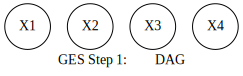

In [13]:
import graphviz

graphviz.Source("""
digraph g {
  rankdir=TB;
  node [shape=circle, fontsize=14];

  X1; X2; X3; X4;

  label="GES Step 1: 空の DAG から開始";

  { rank = same; X1; X2; }
  { rank = same; X3; X4; }
}
""")

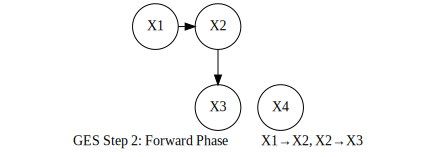

In [14]:
import graphviz

graphviz.Source("""
digraph g {
  rankdir=TB;
  node [shape=circle, fontsize=14];

  X1 -> X2;
  X2 -> X3;
  X4;

  label="GES Step 2: Forward Phase（例：X1→X2, X2→X3 を追加）";

  { rank = same; X1; X2; }
  { rank = same; X3; X4; }
}
""")

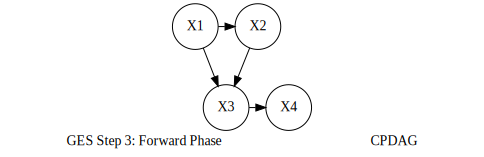

In [15]:
import graphviz

graphviz.Source("""
digraph g {
  rankdir=TB;
  node [shape=circle, fontsize=14];

  X1 -> X2;
  X1 -> X3;
  X2 -> X3;
  X3 -> X4;

  label="GES Step 3: Forward Phase 終了後（過剰フィット気味の CPDAG）";

  { rank = same; X1; X2; }
  { rank = same; X3; X4; }
}
""")

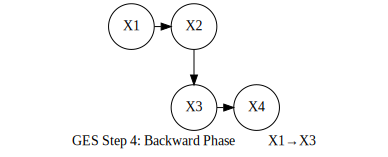

In [16]:
import graphviz

graphviz.Source("""
digraph g {
  rankdir=TB;
  node [shape=circle, fontsize=14];


  X1 -> X2;
  X2 -> X3;
  X3 -> X4;

  label="GES Step 4: Backward Phase（例：X1→X3 を削除）";

  { rank = same; X1; X2; }
  { rank = same; X3; X4; }
}
""")

## スコア

### BIC

$$
BIC = -2\ell(\hat{\theta}) + k\log n
$$

ここで

- $n$：サンプルサイズ
- $k$：モデルのパラメータ数
- $\ell(\hat{\theta})$：最尤推定したときの対数尤度


## 実装

[Greedy Equivalence Search (GES) — 1.0.0 | pgmpy docs](https://pgmpy.org/structure_estimator/ges.html)

  0%|          | 0/8 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'asia': 'C', 'xray': 'C', 'either': 'C', 'dysp': 'C', 'tub': 'C', 'smoke': 'C', 'bronc': 'C', 'lung': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'asia': 'C', 'xray': 'C', 'either': 'C', 'dysp': 'C', 'tub': 'C', 'smoke': 'C', 'bronc': 'C', 'lung': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'asia': 'C', 'xray': 'C', 'either': 'C', 'dysp': 'C', 'tub': 'C', 'smoke': 'C', 'bronc': 'C', 'lung': 'C'}


<Axes: >

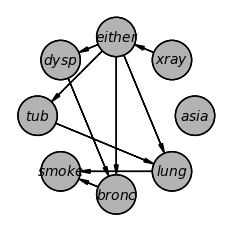

In [12]:
# データセットの生成
import numpy as np
from pgmpy.utils import get_example_model
np.random.seed(42)
model = get_example_model("asia")
model.seed = 42
df = model.simulate(int(1e3))

# 因果構造を推定
from pgmpy.estimators import GES
est = GES(df)
dag = est.estimate(scoring_method="bic-d")

# daftパッケージで作図
dag.to_daft().render()

## 参考

- [[2303.15027] A Survey on Causal Discovery Methods for I.I.D. and Time Series Data](https://arxiv.org/abs/2303.15027)
